$\bf{Objective}$: In this exercise, we will reinforce the concepts of standardization of raw data, K-fold cross
validation and naive Bayes classification. Unless otherwise instructed, you should not make use of any
sklearn modules.

# Wine Dataset
In this exercise, we will use the Wine dataset from UCI Machine Learning Repository. This is a three-class
dataset comprising 178 data samples, with each sample described by a total of 13 (integer- or real-valued)
attributes (i.e., each data sample is 13-dimensional). The three class labels of 0, 1, and 2 correspond to three
different cultivars that gave rise to the wines included in the dataset. 

In [6]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

# Standardization of Data
In an earlier exercise (Exercise #2), we discussed the importance of centering of data for feature learning
and extraction using principal component analysis (PCA). In many datasets, especially those in which a
sample is given by attributes (raw features) that have different scaling, it is also important to both center and
normalize the data before feature learning using PCA. (Refer to “Scaling the Variables” within Sec. 10.2.3 of
“An Introduction to Statistical Learning” for more discussion on this topic.) In this exercise, we will focus on
normalization that makes the (empirical) variance of each attribute unity. Data that has both been centered
and normalized to have zero mean and unit variance at the attribute (raw feature) level is often referred to
as standardized data.

1. Center the wine dataset so that each attribute has zero (empirical) mean


2. Compute two-dimensional PCA features of the centered wine dataset.
   
   • Display the two-dimensional features of wine data samples as points on a two-dimensional scatter
    plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label ‘1’ as green triangles,
    and (iii) label ‘2’ as blue circles


3. Normalize the centered wine dataset so that each attribute also has unit (empirical) variance.


4. Compute two-dimensional PCA features of the standardized (centered and normalized) wine dataset.
    
    • Display the two-dimensional features of standardized wine data samples as points on a twodimensional
    scatter plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label
    ‘1’ as green triangles, and (iii) label ‘2’ as blue circles.


5. In your opinion, based on the above two plots, which PCA features would lead to better classification
   performance?



In [7]:
# Problem 1: center the dataset 
import numpy as np
meanVector = samples.mean(axis = 0)
#compute the center
centeredVector = samples-meanVector

#Problem 2 part 1: Compute two-dimensional PCA Features using SVD
U, s, Vh = np.linalg.svd(centeredVector)
U_2 = Vh.T[:,0:2]
X_tilde = centeredVector@U_2

# Next we define our labels; label0, label1, label2
label0 = X_tilde[labels == 0]
label1 = X_tilde[labels == 1]
label2 = X_tilde[labels == 2]

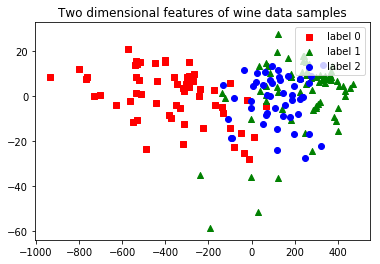

In [8]:
# Problem 2 part 2: plot the features
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(label0[:,0],label0[:,1], c = "r", marker = "s", label = "label 0" )
plt.scatter(label1[:,0],label1[:,1], c = "g", marker = "^", label = "label 1" )
plt.scatter(label2[:,0],label2[:,1], c = "b", marker = "o", label = "label 2" )

plt.title("Two dimensional features of wine data samples")
plt.legend(loc=1)
plt.show()

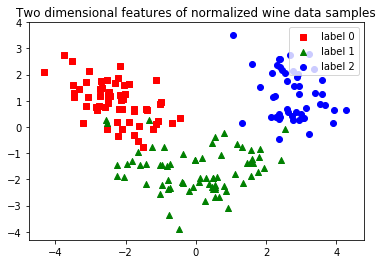

In [9]:
# Problem 3: Normalize the centered wine dataset
standardVector = samples.std(axis = 0)
NormalVector = centeredVector/standardVector

#Problem 4: PCA on normalized vector
# Same steps as before but using NormalVector instead of centeredVector
U, s, Vh = np.linalg.svd(NormalVector)
U_2 = Vh.T[:,0:2]
X_tilde = NormalVector@U_2
# Next we define our labels; label0, label1, label2
label0 = X_tilde[labels == 0]
label1 = X_tilde[labels == 1]
label2 = X_tilde[labels == 2]

#Problem 4 part 2: Plot the PCA features
plt.figure()
plt.scatter(label0[:,0],label0[:,1], c = "r", marker = "s", label = "label 0" )
plt.scatter(label1[:,0],label1[:,1], c = "g", marker = "^", label = "label 1" )
plt.scatter(label2[:,0],label2[:,1], c = "b", marker = "o", label = "label 2" )

plt.title("Two dimensional features of normalized wine data samples")
plt.legend(loc=1)
plt.show()

# Problem  5
I feel that the normalized data set seems to have a better classification performance. When you look at the two plots, the standardized features are all grouped together or are within the same area, give or take a few outliers that are in other labels. This is compared to the centered features which for the most part all are clustered together to where it is almost indiscernable.

# Naive Bayes Classification
1. Build a three-class naive Bayes classifier that takes as input two-dimensional data and assumes each
feature of the data to be conditionally Gaussian (i.e., Gaussian naive Bayes). You should assume that
all classes are equally likely and that the class labels take values in the set {0, 1, 2}, as in the wine
dataset.
2. Use Gaussian naive Bayes classifier for classification of the wine dataset using K-fold cross validation
with K = 5 as follows:1

    • Case I: Perform classification using your implementation of Gaussian naive Bayes classifier and
    two-dimensional PCA features of centered data only.
    
    • Case II: Perform classification using your implementation of Gaussian naive Bayes classifier and
    two-dimensional PCA features of standardized data.
    
    • Case III: Perform classification using sklearn’s implementation of Gaussian naive Bayes classifier
    (sklearn.naive_bayes.GaussianNB) and two-dimensional PCA features of standardized data.


3. Compare and contrast the mean and variance of the classification accuracy of the classifiers in Case I,
Case II, and Case III.
